<a href="https://colab.research.google.com/github/mjkanf1994/ml_edu/blob/master/0818_ml_iris_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## (1)패키지 불러오기
-sklearn 패키지를 불러온다

In [4]:
import sklearn  
print(sklearn.__version__)

0.22.2.post1


## (2) 데이터불러오기
-sklearn 내장데이터

In [5]:
from sklearn.datasets import load_iris

iris=load_iris() #bunch 형태의 데이터셋으로 구성되어 있음

#독립변수로 구성된 데이터
iris_data=iris.data

#종속변수
iris_label=iris.target
print('iris target 값 : ',iris_label[[0,50,100]])
print('iris target 명 : ',iris.target_names)

iris target 값 :  [0 1 2]
iris target 명 :  ['setosa' 'versicolor' 'virginica']


### (3) 데이터전처리
-상황 : numpy형태,리스트
-방법 : pandas를 활용해서 데이터 프레임 만들기
-ref. how to convert a scikit-learn dataset to a pandas dataset?
 [https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset]

In [6]:
import pandas as pd
import numpy as np
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [7]:
from sklearn import datasets
import pandas as pd

def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

df_iris = sklearn_to_df(load_iris())
print(df_iris.head(3).to_markdown())

|    |   sepal length (cm) |   sepal width (cm) |   petal length (cm) |   petal width (cm) |   target |
|---:|--------------------:|-------------------:|--------------------:|-------------------:|---------:|
|  0 |                 5.1 |                3.5 |                 1.4 |                0.2 |        0 |
|  1 |                 4.9 |                3   |                 1.4 |                0.2 |        0 |
|  2 |                 4.7 |                3.2 |                 1.3 |                0.2 |        0 |


### (4)데이터 시각화
-시각화를 위한 전처리

In [8]:
temp_data =df_iris.copy()
#print(temp.data.info())

#column 명 바꾸기
temp_data.columns=["sepal_length","sepal_width","petal_length","petal_width","species"]
temp_data.info()

#map
#0-> "setosa"
replace_fct = {0:"setosa",1:"versicolor",2:"verginica"}

temp_data['species']=temp_data['species'].map(replace_fct)
print(temp_data.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa


-수치형 데이터, 히스토그램&박스플롯&산점도

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


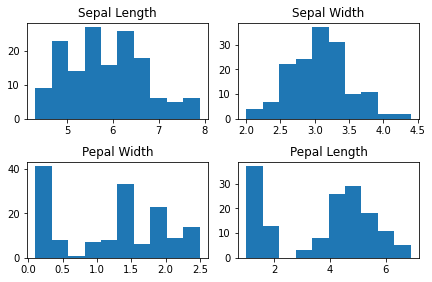

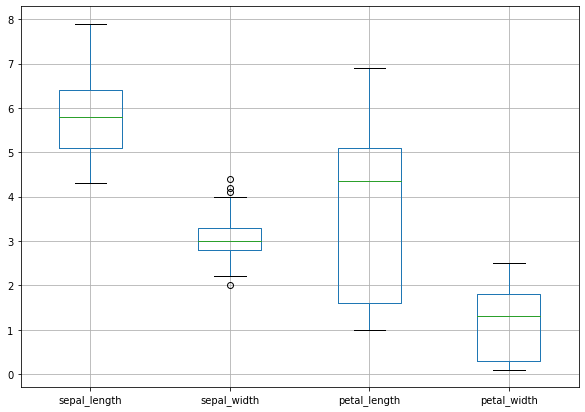

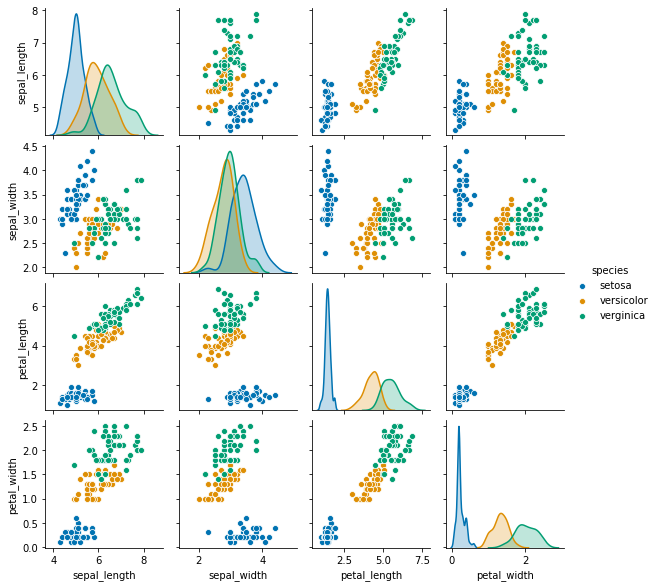

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

###히스토그램
n_bins = 10
fig, axs = plt.subplots(2, 2) # 그래프를 그리기 위해 일종의 레이아웃을 작성한다. 
axs[0, 0].hist(temp_data['sepal_length'], bins = n_bins);
axs[0, 0].set_title('Sepal Length');
axs[0, 1].hist(temp_data['sepal_width'], bins = n_bins);
axs[0, 1].set_title('Sepal Width');
axs[1, 0].hist(temp_data['petal_width'], bins = n_bins);
axs[1, 0].set_title('Pepal Width');
axs[1, 1].hist(temp_data['petal_length'], bins = n_bins);
axs[1, 1].set_title('Pepal Length');

fig.tight_layout(pad=1.0);

###박스플롯
plt.figure(figsize = (10, 7)) 
temp_data.boxplot()


###산점도
sns.pairplot(temp_data,hue="species",height=2,palette="colorblind");


### (5) 데이터셋 분리
- 학습용 데이터와 테스트용 데이터 분리


In [10]:
from sklearn.model_selection import train_test_split
 
 #훈련 데이터와 데스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, # 독립변수 
                                                    iris_label, # 종속변수 
                                                    test_size = 0.2, 
                                                    random_state = 1)


-array
-test_size= 비율(훈련데이터/테스트데이터)
-random_state는 실험의 재현성

###(6) 머신러닝 모형 학습
-머신러닝 모형을 만듭시다.

In [11]:
from sklearn.tree import DecisionTreeClassifier

##객체 생성
dt_clf=DecisionTreeClassifier(random_state=11)

#학습수행
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

### (7) 모형 테스트
-모형 측정

In [12]:
from sklearn.metrics import accuracy_score
pred = dt_clf.predict(X_test)
print('The accuracy of the Decision Tree is: {:.3f}'.format(accuracy_score(pred,y_test)))
#정확도는 0.967이다.

The accuracy of the Decision Tree is: 0.967


### (8) 시각화
-적합한 모형의 결과 시각화로 재구성

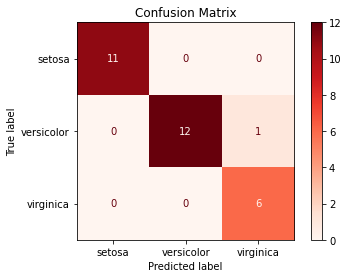

In [13]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import plot_confusion_matrix

labels = ['setosa', 'versicolor', 'virginica']
disp = plot_confusion_matrix(dt_clf, 
                             X_test, y_test, 
                             display_labels=labels, 
                             cmap=plt.cm.Reds, 
                             normalize=None)
disp.ax_.set_title('Confusion Matrix');

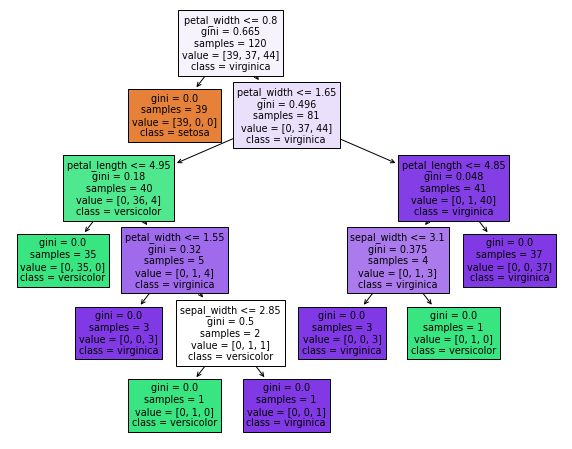

In [14]:
import matplotlib.pyplot as plt

explt_vars = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
fct_val = {0: 'setosa', 1: 'versicolor', 2: "virginica"}

plt.figure(figsize = (10,8))
plot_tree(dt_clf, feature_names = explt_vars, class_names = fct_val, filled = True);